In [271]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from keras.models import Sequential
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [272]:
df = pd.read_excel("./alldata.xlsx")

In [273]:
print(df)

           Date    Price     Open     High      Low   Vol.  Change %  \
0    2010-07-18      0.1      0.0      0.1      0.1   0.08      0.00   
1    2010-07-19      0.1      0.1      0.1      0.1   0.57      0.00   
2    2010-07-20      0.1      0.1      0.1      0.1   0.26      0.00   
3    2010-07-21      0.1      0.1      0.1      0.1   0.58      0.00   
4    2010-07-22      0.1      0.1      0.1      0.1   2.16      0.00   
...         ...      ...      ...      ...      ...    ...       ...   
4932 2024-01-18  41292.7  42763.5  42908.0  40682.6  70.35     -3.45   
4933 2024-01-19  41648.0  41293.8  42164.6  40305.4  72.64      0.86   
4934 2024-01-20  41695.4  41647.6  41858.0  41449.5  22.27      0.11   
4935 2024-01-21  41583.2  41695.4  41878.0  41504.5  16.11     -0.27   
4936 2024-01-22  40825.8  41581.7  41684.9  40711.9  30.31     -1.82   

      FEDFUNDS       Gold  
0         0.18  1204.7500  
1         0.18  1190.2500  
2         0.18  1181.5000  
3         0.18  1191.25

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4937 non-null   datetime64[ns]
 1   Price     4937 non-null   float64       
 2   Open      4937 non-null   float64       
 3   High      4937 non-null   float64       
 4   Low       4937 non-null   float64       
 5   Vol.      4937 non-null   float64       
 6   Change %  4937 non-null   float64       
 7   FEDFUNDS  4937 non-null   float64       
 8   Gold      4937 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 347.3 KB


In [275]:
null_rows = df[df.isnull().any(axis=1)]

# Hiển thị kết quả
print("Các hàng có giá trị null:")
print(null_rows)

Các hàng có giá trị null:
Empty DataFrame
Columns: [Date, Price, Open, High, Low, Vol., Change %, FEDFUNDS, Gold]
Index: []


<Axes: >

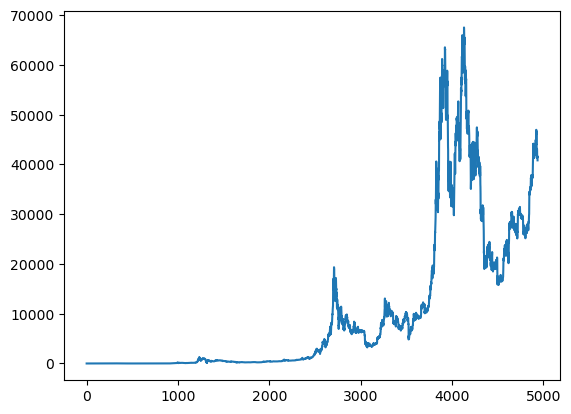

In [276]:
df['Price'].plot()

In [277]:
output = pd.DataFrame(df['Price'])
features = ['Open', 'High', 'Low', 'Vol.', 'Change %', 'FEDFUNDS', 'Gold']

In [278]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform = pd.DataFrame(columns=features, data=feature_transform, index=df.index)
print(feature_transform)

          Open      High       Low      Vol.  Change %  FEDFUNDS      Gold
0     0.000000  0.000000  0.000002  0.000080  0.145185  0.024621  0.145612
1     0.000001  0.000000  0.000002  0.000570  0.145185  0.024621  0.132004
2     0.000001  0.000000  0.000002  0.000260  0.145185  0.024621  0.123792
3     0.000001  0.000000  0.000002  0.000580  0.145185  0.024621  0.132942
4     0.000001  0.000000  0.000002  0.002161  0.145185  0.024621  0.128954
...        ...       ...       ...       ...       ...       ...       ...
4932  0.633264  0.621939  0.613291  0.070383  0.136429  1.000000  0.913659
4933  0.611500  0.611164  0.607605  0.072674  0.147367  1.000000  0.919779
4934  0.616739  0.606720  0.624852  0.022280  0.145464  1.000000  0.919779
4935  0.617447  0.607010  0.625681  0.016118  0.144499  1.000000  0.919779
4936  0.615763  0.604211  0.613733  0.030324  0.140566  1.000000  0.917081

[4937 rows x 7 columns]


In [279]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output[:len(train_index)].values.ravel(), output[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [280]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [281]:
lstm = Sequential()
lstm.add(LSTM(50, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_absolute_percentage_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [282]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=4, verbose=1, shuffle=False)

Epoch 1/200
1123/1123 [==============================] - 3s 1ms/step - loss: 96.9932
Epoch 2/200
1123/1123 [==============================] - 1s 1ms/step - loss: 246.7167
Epoch 3/200
1123/1123 [==============================] - 1s 1ms/step - loss: 166.4747
Epoch 4/200
1123/1123 [==============================] - 1s 1ms/step - loss: 117.8716
Epoch 5/200
1123/1123 [==============================] - 1s 1ms/step - loss: 94.1107
Epoch 6/200
1123/1123 [==============================] - 1s 1ms/step - loss: 94.8941
Epoch 7/200
1123/1123 [==============================] - 1s 1ms/step - loss: 100.4239
Epoch 8/200
1123/1123 [==============================] - 1s 1ms/step - loss: 100.6525
Epoch 9/200
1123/1123 [==============================] - 1s 1ms/step - loss: 97.6197
Epoch 10/200
1123/1123 [==============================] - 1s 1ms/step - loss: 92.3213
Epoch 11/200
1123/1123 [==============================] - 1s 1ms/step - loss: 91.4871
Epoch 12/200
1123/1123 [==============================] - 

In [283]:
y_pred= lstm.predict(X_test)

14/14 [==============================] - 0s 1ms/step


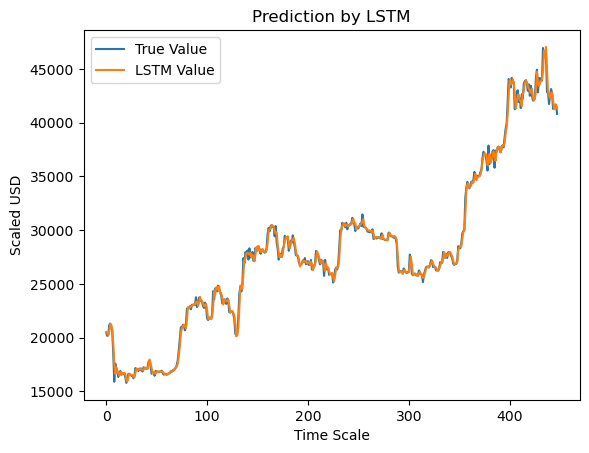

In [284]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [285]:
rmse = mean_squared_error(y_test,y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test,y_pred)
print("RMSE = ", rmse)
print("MAPE = ", mape)

RMSE =  432.05409088930844
MAPE =  0.010068130317515916
